In [1]:
import pandas as pd
import numpy as np
testdata=pd.read_csv('data_mag.csv',header=None)
testdata=np.array(testdata)
data_128=pd.read_csv('data128_att.csv',header=None)
data_128=np.array(data_128)

In [2]:
import random
import os
print(data_128.shape,testdata.shape)

(415930, 128) (415930, 15)


In [3]:
#归一化前
testdata[0]

array([22.2388069 , 20.5110277 , 20.24194427, 20.1458268 , 20.11881749,
        1.7277792 ,  0.26908343,  0.09611747,  0.02700931,  2.11998941,
        0.3205355 ,  0.02898466,  0.03272481,  0.03613797,  0.1095667 ])

In [4]:
#对星等数据进行归一化
def scale_minmax(data):
    return (data-data.min())/(data.max()-data.min())

for i in range(0,15):
    testdata[:,i]=scale_minmax(testdata[:,i])

In [5]:
#归一化后
testdata[0]

array([3.95794090e-01, 7.22881797e-01, 4.27828383e-01, 3.03021012e-01,
       3.89454079e-01, 4.17888816e-01, 7.47999626e-01, 6.54530164e-01,
       3.59167443e-01, 4.86288924e-01, 1.14727068e-07, 6.96020597e-04,
       9.79835817e-05, 1.10148879e-08, 4.82120177e-04])

In [6]:
X = testdata

In [7]:
print(X[0])
print(X.shape)

[3.95794090e-01 7.22881797e-01 4.27828383e-01 3.03021012e-01
 3.89454079e-01 4.17888816e-01 7.47999626e-01 6.54530164e-01
 3.59167443e-01 4.86288924e-01 1.14727068e-07 6.96020597e-04
 9.79835817e-05 1.10148879e-08 4.82120177e-04]
(415930, 15)


In [8]:
Y = data_128

In [9]:
Y[0]

array([0.        , 0.28354907, 0.00287842, 0.52421135, 0.        ,
       0.4124236 , 0.        , 0.        , 0.08798833, 0.        ,
       0.        , 0.4147914 , 0.        , 0.31539166, 0.        ,
       0.30572549, 0.        , 0.22732116, 0.        , 0.        ,
       0.        , 0.3546334 , 0.        , 0.26890218, 0.63035053,
       0.        , 0.        , 0.1440393 , 0.        , 0.        ,
       0.47783142, 0.17327282, 0.        , 0.25363016, 0.        ,
       0.55338115, 0.5457725 , 0.58127236, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08024985, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.30087745, 0.        , 0.22181012, 0.        , 0.        ,
       0.5439936 , 0.34668416, 0.        , 0.20465052, 0.        ,
       0.4929799 , 0.1190673 , 0.        , 0.        , 0.29773685,
       0.01531482, 0.        , 0.        , 0.43425375, 0.        ,
       0.28080118, 0.        , 0.        , 0.30950707, 0.38715

In [10]:
Y.shape

(415930, 128)

In [11]:
#对数据进行归一化
import math
feature=128

def nom_flow(data):             
    for i in range(data.shape[0]):
        sum=0
        for j in range(feature):
            sum=sum+data[i,j]**2
        for j in range(feature):
            data[i,j]=data[i,j]/math.sqrt(sum)
nom_flow(Y)


'\n#对光谱128数据进行归一化\ndef scale_minmax(data):\n    return (data-data.min())/(data.max()-data.min())\n\nfor i in range(0,128):\n    Y[:,i]=scale_minmax(Y[:,i])\n'

In [12]:
Y[0]

array([0.        , 0.09683448, 0.00098301, 0.17902275, 0.        ,
       0.14084626, 0.        , 0.        , 0.03004878, 0.        ,
       0.        , 0.14165488, 0.        , 0.107709  , 0.        ,
       0.10440792, 0.        , 0.07763216, 0.        , 0.        ,
       0.        , 0.1211104 , 0.        , 0.09183244, 0.2152702 ,
       0.        , 0.        , 0.04919068, 0.        , 0.        ,
       0.1631836 , 0.05917418, 0.        , 0.08661691, 0.        ,
       0.18898449, 0.18638607, 0.19850958, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02740602, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10275227, 0.        , 0.07575009, 0.        , 0.        ,
       0.18577856, 0.11839566, 0.        , 0.06988994, 0.        ,
       0.16835694, 0.04066252, 0.        , 0.        , 0.10167973,
       0.00523014, 0.        , 0.        , 0.14830144, 0.        ,
       0.09589605, 0.        , 0.        , 0.10569936, 0.13221

In [13]:
#分割数据集
from sklearn.model_selection import train_test_split
#Y = data_16
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state=42)
print(X_train[0])

[3.00908473e-01 7.04727408e-01 4.46109117e-01 2.99347830e-01
 3.75655176e-01 3.17010989e-01 7.18700844e-01 6.68918557e-01
 3.65814640e-01 4.01778030e-01 2.53859430e-08 6.46557273e-04
 9.40387973e-05 1.15872505e-08 4.40129597e-04]


In [14]:
#引入相关的库
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
os.environ['CUDA_VISIBLE_DEVICES']='1'
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
set_session(tf.Session(config=config))
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, MaxPooling1D, GlobalAveragePooling1D
from keras.utils import np_utils
import keras.backend as K
from keras.layers import *
from keras.models import Model
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import pickle
import keras
#import astropy.units as u 

#plt.plot(Y_train[0])
#print(y_test[1])

Using TensorFlow backend.


In [15]:
input_dims = 15
inputs = Input(shape=(input_dims,))
#inputs=Flatten()(inputs)
dense1=Dense(8,activation = 'relu')(inputs)
dense2=Dense(16,activation = 'relu')(dense1)
dense3=Dense(32,activation = 'relu')(dense2)
dense4 = Dense(64,activation = 'relu')(dense3)
dense5 = Dense(128,activation = 'relu')(dense4)
model = Model(inputs = inputs,outputs = dense5)
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
Total params: 11,248
Trainable params: 11,248
Non-trainable params: 0
_______________________________________________________

In [16]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, data_128,test_size = 0.2, random_state=42)

In [16]:
from keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint
from keras.optimizers import *

my_callbacks = [EarlyStopping(patience=10),
             ModelCheckpoint('model/gen128.h5', save_best_only=True,save_weights_only = False)]
model.compile(loss='logcosh',
              optimizer=Adam(1e-3, amsgrad=True))
model.fit(X_train,Y_train, epochs=100,validation_data = (X_test,Y_test), workers=4, use_multiprocessing=True,
                      batch_size = 512,
                    callbacks=my_callbacks)


Train on 332744 samples, validate on 83186 samples
Epoch 1/100
332744/332744 [==============================] - 2s 7us/step - loss: 0.0021 - val_loss: 0.0017
Epoch 2/100
332744/332744 [==============================] - 2s 6us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 3/100
332744/332744 [==============================] - 2s 6us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4/100
332744/332744 [==============================] - 2s 6us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 5/100
332744/332744 [==============================] - 2s 6us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/100
332744/332744 [==============================] - 2s 6us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 7/100
332744/332744 [==============================] - 2s 6us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 8/100
332744/332744 [==============================] - 2s 6us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/100
332744/332744 [==============================] - 2s 6us/step - loss: 0.0015 - va

In [17]:
zz=model.predict(X)

In [18]:
zz.shape

(415930, 128)

In [19]:
np.savetxt('gen_data128.csv',zz,delimiter=',')

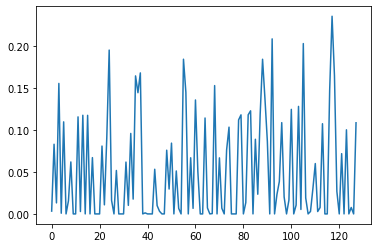

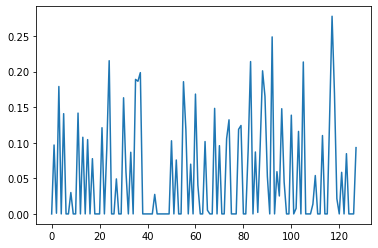

In [20]:
plt.plot(zz[0])
plt.show()
plt.plot(data_128[0])                                                                                                                                           